In [1]:
# More distance stuff
# These two lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../..")
# Importing GemPy
import gempy as gp
# Embedding matplotlib figures in the notebooks
%matplotlib inline
# Importing auxiliary libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# set resolution, extent and input data
geo_data = gp.create_data([0,1000,0,1000,0,1000],resolution=[50,1,50], 
                        path_o = os.pardir+"/data/input_data/jan_models/model2_orientations.csv",
                        path_i = os.pardir+"/data/input_data/jan_models/model2_surface_points.csv") 

Active grids: ['regular']


In [21]:
geo_data.surfaces.colors.change_colors()

Click to select new colors.


In [22]:
# define series and assign surfaces
gp.map_series_to_surfaces(geo_data, {"Strat_Series": ('rock2','rock1'),"Basement_Series":('basement')})

,surface,series,order_surfaces,isBasement,color,id
1,rock2,Strat_Series,1,False,#4285F4,1
0,rock1,Strat_Series,2,False,#DB4437,2
2,basement,Basement_Series,1,True,#F4B400,3


In [23]:
# define the interpolator
interp_data = gp.set_interpolation_data(geo_data, compile_theano=True,
                                        theano_optimizer='fast_compile')

Compiling theano function...
Compilation Done!


In [24]:
#calcualte the solution
sol = gp.compute_model(geo_data)

../..\gempy\core\solution.py:258: UserWarning: Surfaces not computed due to: marching_cubes_lewiner() got an unexpected keyword argument 'mask'
  warnings.warn('Surfaces not computed due to: ' + str(e))


In [25]:
sol.lith_block.shape
sol.grid.regular_grid.values[:,1].shape

(2500,)

In [26]:
sol.scalar_field_matrix.shape
sol.gradient

array([], dtype=float64)

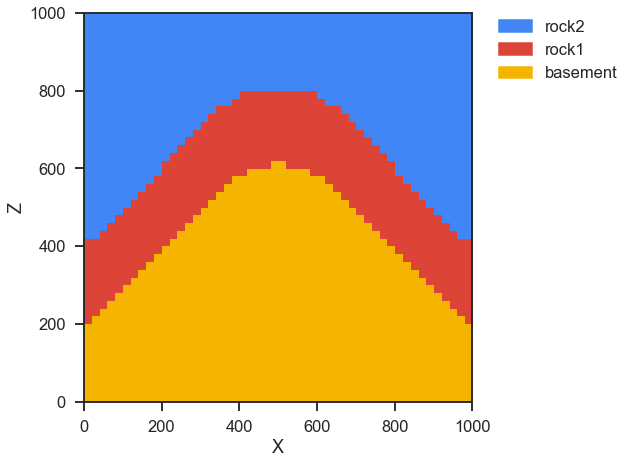

In [27]:
gp.plot.plot_section(geo_data, cell_number=0)

In [28]:
# gradient not implemented in gempy 2.0
np.unique(sol.lith_block)

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.00000001,
       1.00000001, 1.00000373, 1.00000373, 1.00003849, 1.00003849,
       1.00013273, 1.00013273, 1.06281741, 1.06281741, 1.27520499,
       1.27520499, 1.30272778, 1.30272778, 1.96270837, 1.96270837,
       1.99482759, 1.99482759, 1.9999303 , 1.9999303 , 1.99999996,
       2.        , 2.        , 2.        , 2.        , 2.        ,
       2.        , 2.        , 2.        , 2.        , 2.        ,
       2.        , 2.        , 2.        , 2.        , 2.        ,
       2.        , 2.00000002, 2.00000002, 2.00000005, 2.00000005,
       2.00463834, 2.00463834, 2.04566769, 2.04566769, 2.99952269,
       2.99952269, 2.99999349, 2.99999349, 3.        , 3.        ,
       3.        ])

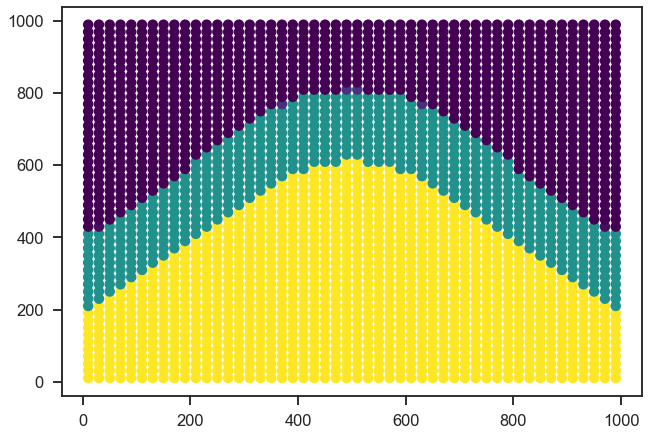

In [29]:
plt.scatter(sol.grid.regular_grid.values[:,0], sol.grid.regular_grid.values[:,2], c=sol.lith_block, cmap='viridis')

In [30]:
#sol.scalar_field_matrix[0]

In [31]:
x =  np.unique(sol.grid.regular_grid.values[:,0])
y =  np.unique(sol.grid.regular_grid.values[:,2])

In [32]:
X, Y = np.meshgrid(x, y)

zs = sol.scalar_field_matrix
Z = zs.reshape(X.shape)



In [33]:
sol.grid.regular_grid.resolution

array([50,  1, 50])

In [34]:
gx, gy = np.gradient(Z,20,20)

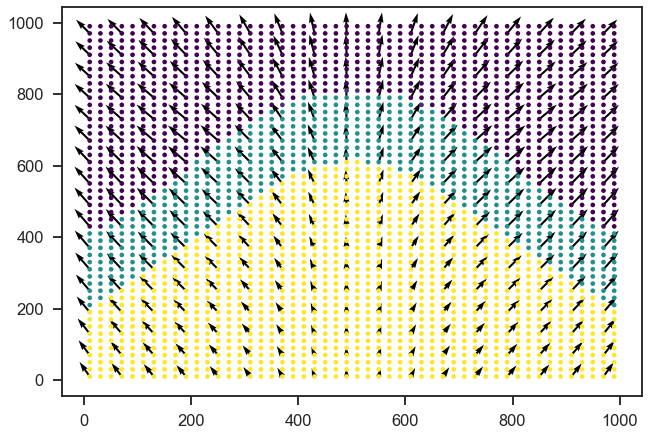

In [35]:
fig, ax = plt.subplots()
q = ax.quiver(Y[::3, ::3], X[::3, ::3], gx[::3, ::3], gy[::3, ::3])

ax.quiverkey(q, X=0.3, Y=1.1, U=1,
             label='Quiver key, length = 1')

plt.scatter(sol.grid.regular_grid.values[:,0], sol.grid.regular_grid.values[:,2], s=10, c=sol.lith_block, cmap='viridis')
plt.show()

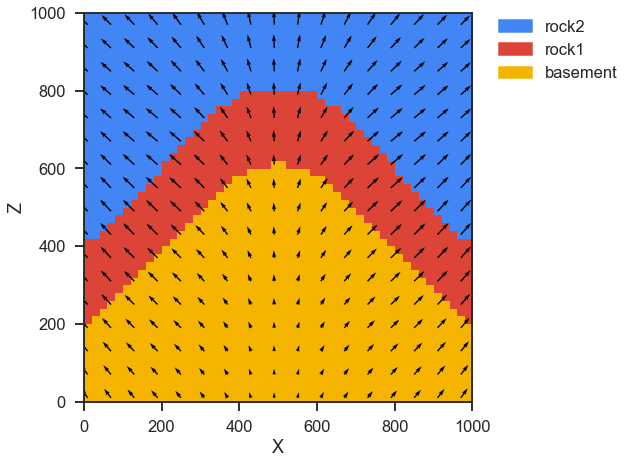

In [37]:

fig, ax = plt.subplots()
#q = ax.quiver(Y, X, gx, gy)
q = ax.quiver(Y[::3, ::3], X[::3, ::3], gx[::3, ::3], gy[::3, ::3])

#ax.quiverkey(q, X=0.3, Y=1.1, U=1, label='Quiver key, length = 1')

#plt.scatter(sol.grid.regular_grid.values[:,0], sol.grid.regular_grid.values[:,2], s=10, c=sol.lith_block, cmap='viridis')

gp.plot.plot_section(geo_data, cell_number=0)

plt.show()

(None,)

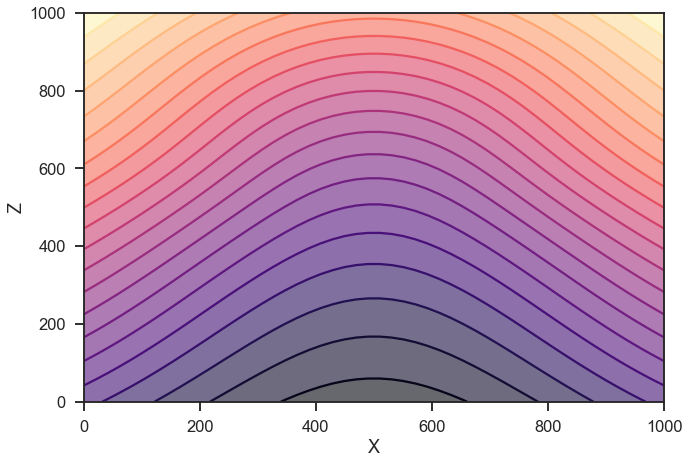

In [76]:
#gp.plot.plot_section(geo_data, cell_number=0)
gp.plot.plot_scalar_field(geo_data, cell_number=0, N=20, plot_data=False), #colors='k', cmap=None)

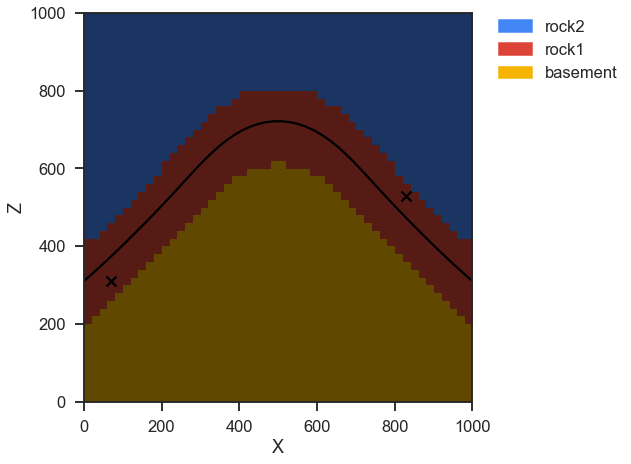

In [58]:
gp.plot.plot_section(geo_data, cell_number=0)
#plt.scatter(sol.grid.regular_grid.values[:,0], sol.grid.regular_grid.values[:,2], s=1, c='black')
plt.scatter(sol.grid.regular_grid.values[165,0], sol.grid.regular_grid.values[165,2], s=100, c='black', marker='x')
plt.scatter(sol.grid.regular_grid.values[2076,0], sol.grid.regular_grid.values[2076,2], s=100, c='black', marker='x')
#plt.plot()
gp.plot.plot_scalar_field(geo_data, cell_number=0, N=1, plot_data=False, colors='k', cmap=None)

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, gx)

ValueError: Unknown projection '3d'

<Figure size 748.8x514.8 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
def fun(x, y):
    return x**2 + y

In [ ]:
x = np.arange(-10,10,2)
y = np.arange(-10,10,2)

X, Y = np.meshgrid(x, y)

zs = np.array(fun(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)

In [ ]:
gx,gy = np.gradient(Z,2,2)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, gy)